# Feedforward Network Demo

Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yad

Load Dataset

Shape of x: (100, 2)
Shape of y: (100, 1)


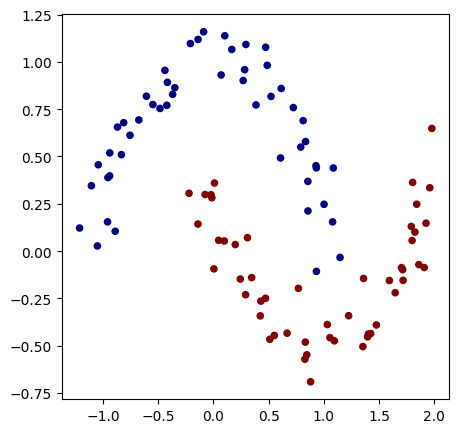

In [2]:
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.1)

x = x.astype(np.float32)
y = np.expand_dims(y.astype(np.float32), axis=1)

print('Shape of x:', x.shape)
print('Shape of y:', y.shape)

# Visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet')

# TODO: TABLE OF DATA
# TODO: NORMALIZE DATA?

Define Model

In [3]:
from yad import nn
from yad.nn import functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()

        # Network with three layers: two 16 neuron layers and one single neuron layer.

        self.linear1 = nn.Linear(in_features=2,  out_features=16)
        self.linear2 = nn.Linear(in_features=16, out_features=16)
        self.linear3 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.sigmoid(self.linear3(x))

        return x

Train Model

In [4]:

from yad import optim

num_epochs  = 100
batch_size  = 10
num_batches = x.shape[0] // batch_size

model     = Model()
optimizer = optim.SGD(model.parameters(), lr=5e-2, weight_decay=1e-4)

for k in range(num_epochs):
    train_loss     = 0
    train_accuracy = 0

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx   = start_idx + batch_size

        input  = yad.Tensor(x[start_idx:end_idx])
        labels = yad.Tensor(y[start_idx:end_idx])

        # Foward
        preds = model(input)
        loss  = F.binary_cross_entropy(preds, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Update
        optimizer.step()

        train_loss     += loss[0]
        train_accuracy += np.count_nonzero(np.round(labels.data).astype(bool) == np.round(preds.data).astype(bool))
        # TODO: Create metrics module
    
    # TODO
    train_loss /= num_batches

    print(f'Epoch {k+1} loss {train_loss:.3f} accuracy {train_accuracy}')

Epoch 1 loss 0.673 accuracy 50
Epoch 2 loss 0.638 accuracy 51
Epoch 3 loss 0.609 accuracy 73
Epoch 4 loss 0.581 accuracy 84
Epoch 5 loss 0.551 accuracy 86
Epoch 6 loss 0.519 accuracy 83
Epoch 7 loss 0.486 accuracy 82
Epoch 8 loss 0.454 accuracy 82
Epoch 9 loss 0.426 accuracy 80
Epoch 10 loss 0.402 accuracy 81
Epoch 11 loss 0.383 accuracy 82
Epoch 12 loss 0.367 accuracy 83
Epoch 13 loss 0.355 accuracy 83
Epoch 14 loss 0.344 accuracy 83
Epoch 15 loss 0.336 accuracy 83
Epoch 16 loss 0.329 accuracy 83
Epoch 17 loss 0.322 accuracy 83
Epoch 18 loss 0.316 accuracy 84
Epoch 19 loss 0.311 accuracy 84
Epoch 20 loss 0.306 accuracy 85
Epoch 21 loss 0.302 accuracy 86
Epoch 22 loss 0.297 accuracy 86
Epoch 23 loss 0.293 accuracy 86
Epoch 24 loss 0.289 accuracy 86
Epoch 25 loss 0.286 accuracy 86
Epoch 26 loss 0.283 accuracy 86
Epoch 27 loss 0.279 accuracy 88
Epoch 28 loss 0.277 accuracy 88
Epoch 29 loss 0.274 accuracy 88
Epoch 30 loss 0.272 accuracy 87
Epoch 31 loss 0.269 accuracy 87
Epoch 32 loss 0.2